# Assignment 1: K-Center, K-Means, and HAC
## CS 6180: Clustering
## Michael Young / u0742759

### Problem 1

Implement the K-Center (aka FurthestPoint) algorithm using euclidean distance as the distance function. Using your K-Center implementation, evaluate data1.csv with 3 centers and then try with 4 centers. Next assign each point to its nearest center (using euclidean distance as the distance function) and generate a scatter plot where each cluster is represented by a different color. Also, represent the cluster centers as solid black.  

Using this same data set run K-Means using 3 centers and produce similar plots as described previously. Compare and contrast the results with K-Centers, what are the differences you are seeing. Feel free to use an out-of-the-box K-Means (eg. sklearn.cluster.KMeans). Finally produce two cost function plots with # centers along the x-axis and cost of that clustering along the y-axis. Do this for both algorithms (K-Center and K-Means).  



[[ 0.00000000e+00  7.41676658e+00  8.24678858e+00  1.00000000e+00]
 [ 1.00000000e+00  2.21450825e+00  1.29828096e+01  1.00000000e+00]
 [ 2.00000000e+00  1.09242264e+01  6.34801951e+00  1.00000000e+00]
 ...
 [ 5.97000000e+02  4.47583144e-01 -9.06053065e+00  3.00000000e+00]
 [ 5.98000000e+02  3.86501491e+00  5.68675885e+00  1.00000000e+00]
 [ 5.99000000e+02  6.99339878e+00  4.37396330e+00  1.00000000e+00]]


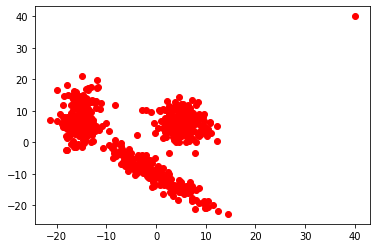

In [81]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load the Data
f = np.loadtxt(open("data1.csv", "rb"), delimiter=",", skiprows=1)

print(f)
# Plotting data to see if any kind of obvious clustering
x = f[:,1]
y = f[:,2]

plt.plot(x,y,'or')
plt.show()

In [82]:
# K-center (aka furthest point)

# First step, lets compute pairwise L2 distance between
# every point and store in a matrix where indices correspond to cluster point

dim = len(f[:])
dists = np.zeros((dim,dim))

# At some point try to develop vectorized implementation
for i in f:
    for j in f:
        dists[int(i[0]),int(j[0])] = np.sqrt((i[1] - j[1])**2 + (i[2]-j[2])**2)

#print(dists[1][0])


In [129]:
# K-center continued

# Choose k
k = 3

# Dict of clusters
clusters = {}
# List of centers
C = []

# Pick an arbitrary point and assign it as first center c1
# I'll make this random for the h*ll of it
rando = np.random.randint(0,600)
clusters[rando] = {rando}
C.append(rando)
#print(C)

# Let's assign every point to this first cluster
for i in range(dim):
    clusters[rando].add(i)

#print(clusters)
# Gonzalez algo
for i in range(1,k):
    max_dists = []
    #print(i)
    # For each center thus far, find the max distance away from these centers, assign new
    # center to the largest of these
    for cent in C:
        # Compute distance between every point in a cluster and its nearest center
        my_dists = [(dists[j,cent],j) for j in clusters[cent]]
        #print(my_dists)
        # Return max values along with its index
        max_dists.append((max(my_dists))) #,np.argmax(my_dists)))
    #print(max_dists)
    
    # Assign new center
    new_center = max(max_dists, key = lambda x: x[0])[1]
    C.append(new_center)
    clusters[new_center] = {new_center}
    #print(C)
    
    # Reassign points to their closest center
    new_clusters = []
    for x in f:
        x_dists = []
        for cent in C:
            # loops through points distances to every center and stores them along with center
            x_dists.append((dists[int(x[0])][cent],cent))
        # finds which center the point is closest to 
        x_new_c = min(x_dists)[1]
        #print(x_new_c)
        
        # Now I need to assign point to new cluster and remove from the old
        # I'm not feeling particularly clever rn, so I'll just loop through clusters
        # And remove current point, then add it to right cluster
        
        for clust in clusters:
            #print(clusters[clust])
            # remove point from all clusters
            if int(x[0]) in clusters[clust]:
                clusters[clust].remove(int(x[0]))
            # add it back to correct cluster
            clusters[x_new_c].add(int(x[0]))
            
print(C)
#print(clusters)

# Need to develop an idea of 'Cost' for the entire clustering...
# I think this is just the max distance between a point and its nearest center? so max of all of such points?

# Lets just loop through each cluster, store max's in array and take max of that - that value will be the 
# overall cost 

cost = []
for h in clusters:
    clust_cost = []
    #print(h)
    for q in list(clusters[h]):
        #print(k)
        clust_cost.append(dists[q,h])
    cost.append(max(clust_cost))
#print(cost)
print("cost: ",max(cost),"for {} clusters".format(k))
        

[224, 9, 99]
cost:  26.70008429111221 for 3 clusters


In [130]:
#cost:  65.77683908746468 for 1 clusters
#cost:  46.28100234263184 for 2 clusters
#cost:  24.10286656048513 for 3 clusters
#cost:  21.959605496598073 for 4 clusters
#cost:  14.10407297851105 for 5 clusters
#cost:  12.543981001740528 for 6 clusters
#cost:  13.042772937235409 for 7 clusters
#cost:  11.570941692036605 for 8 clusters
#cost:  10.372017979455759 for 9 clusters
#cost:  9.718753953028038 for 10 clusters

k_cent_costs = [65.77683908746468,46.28100234263184,24.10286656048513, 21.959605496598073,14.10407297851105,
               12.543981001740528,13.042772937235409,11.570941692036605,10.372017979455759, 9.718753953028038]

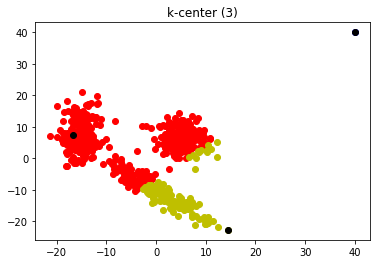

In [116]:
# Now for plotting when k = 3 

# Now I convert from points back to my original point values
m = {}
for idx,l in enumerate(list(clusters.values())):
    #print(idx,l)
    m[idx] = np.array([f[i,:] for i in l])
#print(m)
plt.plot(m[0][:,1],m[0][:,2],'or')
plt.plot(m[1][:,1],m[1][:,2],'ob')
plt.plot(m[2][:,1],m[2][:,2],'oy')

# Need to make centers black
plt.plot(f[C[0],1],f[C[0],2],'ok')
plt.plot(f[C[1],1],f[C[1],2],'ok')
plt.plot(f[C[2],1],f[C[2],2],'ok')

#plt.plot(C[3][:,1],C[3][:,2],'oc')
plt.title("k-center ({})".format(k))
plt.show()

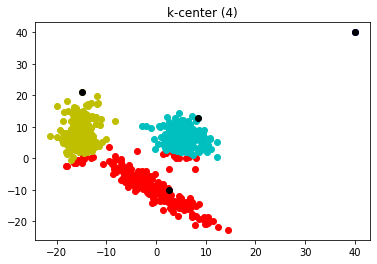

In [121]:
# Now for plotting when k = 4 

# Now I convert from points back to my original point values
m = {}
for idx,l in enumerate(list(clusters.values())):
    #print(idx,l)
    m[idx] = np.array([f[i,:] for i in l])
#print(m)
plt.plot(m[0][:,1],m[0][:,2],'or')
plt.plot(m[1][:,1],m[1][:,2],'ob')
plt.plot(m[2][:,1],m[2][:,2],'oy')
plt.plot(m[3][:,1],m[3][:,2],'oc')
#plt.plot(m[4][:,1],m[4][:,2],'og')

# Need to make centers black
plt.plot(f[C[0],1],f[C[0],2],'ok')
plt.plot(f[C[1],1],f[C[1],2],'ok')
plt.plot(f[C[2],1],f[C[2],2],'ok')
plt.plot(f[C[3],1],f[C[3],2],'ok')
#plt.plot(f[C[4],1],f[C[4],2],'ok')

#plt.plot(C[3][:,1],C[3][:,2],'oc')
plt.title("k-center ({})".format(k))
plt.show()

Text(0.5, 1.0, 'K-means')

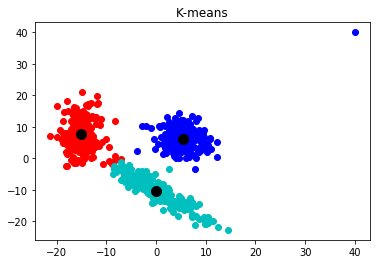

In [40]:
# K - Means 
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

X = f[:,1:3].reshape(len(f),2)
y_km = km.fit_predict(X)

#print(y_km)

plt.plot(f[y_km == 0, 1],f[y_km == 0, 2],"or")
plt.plot(f[y_km == 1, 1],f[y_km == 1, 2],"ob")
plt.plot(f[y_km == 2, 1],f[y_km == 2, 2],"oc")
# Plot the centers
plt.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],"ok",ms=10)
plt.title("K-means")


**Compare and contrast:** These algorithms have a very similar flavor, but end up yielding markedly different results when confronted with outliers. The k-center algo, by virture of the farthest points algorithm is very sensitive to outliers and always ends up making the outlier its own cluster, which may or may not be desirable. K-means on the other hand is very insensitive to outliers and just incorporates the outlier into the nearest actual cluster, which again, may or may not be desirable. K-means is also a bit more sophisticated in the sense that it can update its center representations, whereas k-center is sort of stuck and very dependent on whatever the first point chosen is. Overall, k-means appears to do a much better job on this particular dataset.

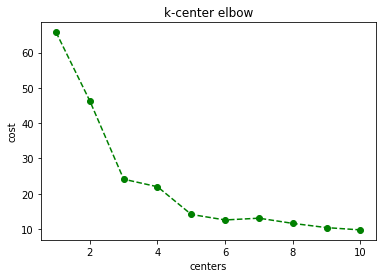

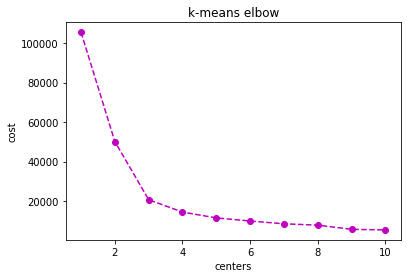

In [146]:
# Cost function plots w/ # centers on X and cluster cost on Y

plt.plot(range(1,11),k_cent_costs,"--g",marker='o')
plt.xlabel("centers")
plt.ylabel("cost")
plt.title("k-center elbow")
plt.show()

# Calculate k-means costs
costs_km = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    costs_km.append(km.inertia_)

plt.plot(range(1,11),costs_km,'--m',marker='o')
plt.xlabel("centers")
plt.ylabel("cost")
plt.title("k-means elbow")
plt.show()

The elbow curve for the k-center is a bit more jagged than for k-means, which is likely because I didn't run the algorithm multiple times and take the average which is basically when the k-means implementation does. The k-means curve shows that 3 is the likely optimal k, and examining the plot shows that. the curve for the k-center is a bit more ambiguous, but I think it's likely that 4 is the best choice based on the plots. 

### Problem 2

Generate your own data sets for running K-Means. Explore how changing the data generating distribution (mean, variance etc) causes K-Means to start to “break”. Again, feel free to use an out-of-the-box K-Means (eg. sklearn.cluster.KMeans).  
  
For data generation Python has make_blobs or see below for some sample code that produces a 2D Gaussian distributed np.array.
